In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Train_Set_90621.csv',index_col=0)
df1 = pd.read_csv('Test_Set_90621.csv',index_col=0)
df.head()

,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,BankState,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status
Application ID,,,,,,,,,,,,,,,,,,,,,
1020200001,Bank_Name_316,Private,12-10-2005,Business_Name_10007,Uttar Pradesh,525161,2005,1.0,219,Uttar Pradesh,...,18550000,25650,1,3,N,N,0,0,13912500,0
1020200002,Bank_Name_1062,Govt,21-11-2006,Business_Name_130906,Uttar Pradesh,1231,2006,1.0,71,Uttar Pradesh,...,2450000,0,1,0,Y,N,0,2369500,1225000,1
1020200003,Bank_Name_39,Private,28-11-2007,Business_Name_105953,Uttar Pradesh,322442,2007,2.0,84,Maharashtra,...,1750000,0,2,2,Y,N,0,0,1487500,0
1020200004,Bank_Name_3,Govt,18-04-2009,Business_Name_103197,Kerala,1231,2009,1.0,300,Delhi,...,38850000,1,1,0,N,N,0,0,29137500,0
1020200005,Bank_Name_126,Govt,23-11-2002,Business_Name_118932,Delhi,1231,2002,2.0,153,Maharashtra,...,2800000,1,2,0,N,Y,0,0,2380000,0


In [6]:
df.shape , df1.shape

((195118, 28), (83623, 27))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195118 entries, 1020200001 to 1020395118
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bank Masked                     195038 non-null  object 
 1   Bank Type                       195038 non-null  object 
 2   Approved_Timestamp              194692 non-null  object 
 3   Name Masked                     195117 non-null  object 
 4   Business Owner State            195115 non-null  object 
 5   Business_Industry_Type_Code     195118 non-null  int64  
 6   Approved_Year                   195118 non-null  int64  
 7   New Business                    195082 non-null  float64
 8   Term                            195118 non-null  int64  
 9   BankState                       195037 non-null  object 
 10  Interest Rate                   195118 non-null  int64  
 11  Employees                       195118 non-null  int64  
 12  Gro

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83623 entries, 20210600001 to 20210683623
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Bank Masked                     83575 non-null  object 
 1   Bank Type                       83575 non-null  object 
 2   Approved_Timestamp              83449 non-null  object 
 3   Name Masked                     83623 non-null  object 
 4   Business Owner State            83623 non-null  object 
 5   Business_Industry_Type_Code     83623 non-null  int64  
 6   Approved_Year                   83623 non-null  int64  
 7   New Business                    83608 non-null  float64
 8   Term                            83623 non-null  int64  
 9   BankState                       83575 non-null  object 
 10  Interest Rate                   83623 non-null  int64  
 11  Employees                       83623 non-null  int64  
 12  Gross Disbursed 

In [9]:
df['Business_Industry_Type_Code'] = df['Business_Industry_Type_Code'].astype(object)
df['Approved_Year'] = df['Approved_Year'].astype(object)
df['Company Branch Code'] = df['Company Branch Code'].astype(object)

In [10]:
df1['Business_Industry_Type_Code'] = df1['Business_Industry_Type_Code'].astype(object)
df1['Approved_Year'] = df1['Approved_Year'].astype(object)
df1['Company Branch Code'] = df1['Company Branch Code'].astype(object)

In [11]:
df.describe(exclude = "object")

,New Business,Term,Interest Rate,Employees,Gross Disbursed Amount,Term_years,Jobs Retained,Male to Female Employees Ratio,Expected Company Income,Funds available with company,Gross_Apprv_Amount,City or Rural,Jobs Generated,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status
count,195082.000000,195118.000000,195118.000000,195118.000000,1.951180e+05,195118.000000,195118.000000,195118.000000,1.951150e+05,1.951180e+05,1.951180e+05,195118.000000,195118.000000,1.951180e+05,1.951180e+05,1.951180e+05,195118.000000
mean,1.279303,110.739860,7.327914,19.122982,1.414492e+07,9.245462,11.418362,15.329211,1.832522e+07,1.253179e+06,1.356561e+07,0.754697,9.055151,9.184186e+00,9.471649e+05,1.052898e+07,0.180598
std,0.451119,78.851772,2.977714,130.032607,2.029931e+07,6.569699,248.744198,11.791947,1.759069e+08,6.455671e+05,1.996955e+07,0.646914,248.317037,3.962911e+03,4.576773e+06,1.610177e+07,0.384686
min,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,1.000020e+05,1.400000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,7.000000e+03,0.000000
25%,1.000000,60.000000,5.000000,3.000000,2.944498e+06,5.000000,0.000000,7.000000,5.000000e+05,6.995165e+05,2.450000e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,1.487500e+06,0.000000
50%,1.000000,84.000000,7.000000,7.000000,7.000000e+06,7.000000,1.000000,13.000000,1.500000e+06,1.239653e+06,6.300000e+06,1.000000,0.000000,0.000000e+00,0.000000e+00,4.375000e+06,0.000000
75%,2.000000,120.000000,10.000000,17.000000,1.673000e+07,10.000000,4.000000,19.000000,7.200000e+06,1.778303e+06,1.589000e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,1.225000e+07,0.000000
max,2.000000,461.000000,12.000000,22222.000000,7.325500e+08,38.000000,8800.000000,50.000000,4.320000e+10,2.500000e+06,3.500000e+08,2.000000,8800.000000,1.750000e+06,1.399999e+08,3.150000e+08,1.000000


In [12]:
df.describe(include = "object")

,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,BankState,Company Branch Code,Carry-forward Credit,Documents Provided
count,195038,195038,194692,195117,195115,195118,195118,195037,195118,194140,194566
unique,42529,2,6408,150526,10,2077,19,12,1635,2,2
top,Bank_Name_42,Private,13-07-2009,Business_Name_39,Delhi,1231,2011,Delhi,1,N,N
freq,9133,130150,210,91,58546,29967,33333,74016,138442,147350,170021


In [13]:
df1.describe(exclude = "object")

,New Business,Term,Interest Rate,Employees,Gross Disbursed Amount,Term_years,Jobs Retained,Male to Female Employees Ratio,Expected Company Income,Funds available with company,Gross_Apprv_Amount,City or Rural,Jobs Generated,Balance Left,Amount Defaulted,Final_Appved_Amount
count,83608.000000,83623.000000,83623.000000,83623.000000,8.362300e+04,83623.000000,83623.000000,83623.000000,8.362300e+04,8.362300e+04,8.362300e+04,83623.000000,83623.000000,8.362300e+04,8.362300e+04,8.362300e+04
mean,1.283466,110.584289,7.340265,18.873731,1.409935e+07,9.232627,9.971455,15.332217,1.806530e+07,1.254716e+06,1.348680e+07,0.754266,7.543917,1.162517e+02,9.355039e+05,1.046583e+07
std,0.452960,78.861893,2.978244,99.576695,2.011175e+07,6.570648,220.503447,11.805500,1.362556e+08,6.449463e+05,1.981300e+07,0.644894,219.777080,2.302241e+04,4.512737e+06,1.602864e+07
min,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,1.000150e+05,3.500000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,1.750000e+04
25%,1.000000,60.000000,5.000000,3.000000,2.968000e+06,5.000000,0.000000,7.000000,5.000000e+05,7.035090e+05,2.450000e+06,0.000000,0.000000,0.000000e+00,0.000000e+00,1.487500e+06
50%,1.000000,84.000000,7.000000,7.000000,7.000000e+06,7.000000,1.000000,13.000000,1.500000e+06,1.243281e+06,6.300000e+06,1.000000,0.000000,0.000000e+00,0.000000e+00,4.291350e+06
75%,2.000000,120.000000,10.000000,18.000000,1.680000e+07,10.000000,4.000000,19.000000,7.166667e+06,1.781822e+06,1.581650e+07,1.000000,1.000000,0.000000e+00,0.000000e+00,1.225000e+07
max,2.000000,442.000000,12.000000,12000.000000,5.389463e+08,37.000000,8800.000000,50.000000,1.974000e+10,2.499942e+06,3.500000e+08,2.000000,8800.000000,5.923190e+06,1.325583e+08,3.500000e+08


In [14]:
df1.describe(include = "object")

,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,BankState,Company Branch Code,Carry-forward Credit,Documents Provided
count,83575,83575,83449,83623,83623,83623,83623,83575,83623,83211,83376
unique,20530,2,6195,75136,10,1971,19,12,1107,2,2
top,Bank_Name_42,Private,13-07-2009,Business_Name_39,Delhi,1231,2011,Delhi,1,N,N
freq,3867,55826,100,40,25195,12732,14374,31762,59259,63104,72936


In [15]:
percent_null = df.isnull().sum()/len(df)*100
percent_null = percent_null.sort_values(ascending = False)
percent_null

Carry-forward Credit              0.501235
Documents Provided                0.282906
Approved_Timestamp                0.218329
BankState                         0.041513
Bank Masked                       0.041001
Bank Type                         0.041001
New Business                      0.018450
Business Owner State              0.001538
Expected Company Income           0.001538
Name Masked                       0.000513
Employees                         0.000000
Business_Industry_Type_Code       0.000000
Approved_Year                     0.000000
Term                              0.000000
Interest Rate                     0.000000
Default_Status                    0.000000
Gross Disbursed Amount            0.000000
Final_Appved_Amount               0.000000
Jobs Retained                     0.000000
Male to Female Employees Ratio    0.000000
Funds available with company      0.000000
Gross_Apprv_Amount                0.000000
Company Branch Code               0.000000
City or Rur

In [16]:
percent_null = df1.isnull().sum()/len(df1)*100
percent_null = percent_null.sort_values(ascending = False)
percent_null

Carry-forward Credit              0.492687
Documents Provided                0.295373
Approved_Timestamp                0.208077
Bank Masked                       0.057400
Bank Type                         0.057400
BankState                         0.057400
New Business                      0.017938
Employees                         0.000000
Name Masked                       0.000000
Business Owner State              0.000000
Business_Industry_Type_Code       0.000000
Approved_Year                     0.000000
Term                              0.000000
Interest Rate                     0.000000
Final_Appved_Amount               0.000000
Gross Disbursed Amount            0.000000
Amount Defaulted                  0.000000
Jobs Retained                     0.000000
Male to Female Employees Ratio    0.000000
Expected Company Income           0.000000
Funds available with company      0.000000
Gross_Apprv_Amount                0.000000
Company Branch Code               0.000000
City or Rur

In [17]:
df = df.drop(['Carry-forward Credit','Documents Provided','Approved_Timestamp'],axis = 1)
df1 = df1.drop(['Carry-forward Credit','Documents Provided','Approved_Timestamp'],axis = 1)

In [18]:
#using strategy = mode in
#'Documents Provided','Approved_Timestamp','BankState','Bank Masked','Bank Type','New Business','Business Owner State',
#'Name Masked'

In [19]:
missing = ['BankState','Bank Masked','Bank Type','New Business','Business Owner State','Name Masked','Expected Company Income']

In [20]:
missing1 = ['Bank Masked','Bank Type','BankState','New Business']

In [21]:
#Treating missing values with the help of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[missing])
df[missing] = imputer.transform(df[missing])

In [22]:
#Treating missing values with the help of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df1[missing1])
df1[missing1] = imputer.transform(df1[missing1])

In [23]:
percent_null = df.isnull().sum()/len(df)*100
percent_null = percent_null.sort_values(ascending = False)
percent_null

Default_Status                    0.0
Gross Disbursed Amount            0.0
Bank Type                         0.0
Name Masked                       0.0
Business Owner State              0.0
Business_Industry_Type_Code       0.0
Approved_Year                     0.0
New Business                      0.0
Term                              0.0
BankState                         0.0
Interest Rate                     0.0
Employees                         0.0
Term_years                        0.0
Final_Appved_Amount               0.0
Jobs Retained                     0.0
Male to Female Employees Ratio    0.0
Expected Company Income           0.0
Funds available with company      0.0
Gross_Apprv_Amount                0.0
Company Branch Code               0.0
City or Rural                     0.0
Jobs Generated                    0.0
Balance Left                      0.0
Amount Defaulted                  0.0
Bank Masked                       0.0
dtype: float64

In [24]:
percent_null = df1.isnull().sum()/len(df1)*100
percent_null = percent_null.sort_values(ascending = False)
percent_null

Final_Appved_Amount               0.0
Amount Defaulted                  0.0
Bank Type                         0.0
Name Masked                       0.0
Business Owner State              0.0
Business_Industry_Type_Code       0.0
Approved_Year                     0.0
New Business                      0.0
Term                              0.0
BankState                         0.0
Interest Rate                     0.0
Employees                         0.0
Gross Disbursed Amount            0.0
Term_years                        0.0
Jobs Retained                     0.0
Male to Female Employees Ratio    0.0
Expected Company Income           0.0
Funds available with company      0.0
Gross_Apprv_Amount                0.0
Company Branch Code               0.0
City or Rural                     0.0
Jobs Generated                    0.0
Balance Left                      0.0
Bank Masked                       0.0
dtype: float64

In [25]:
df_num = df.select_dtypes(exclude = 'O')
df_cat = df.select_dtypes(include = 'O')

In [26]:
df_num1 = df1.select_dtypes(exclude = 'O')
df_cat1 = df1.select_dtypes(include = 'O')

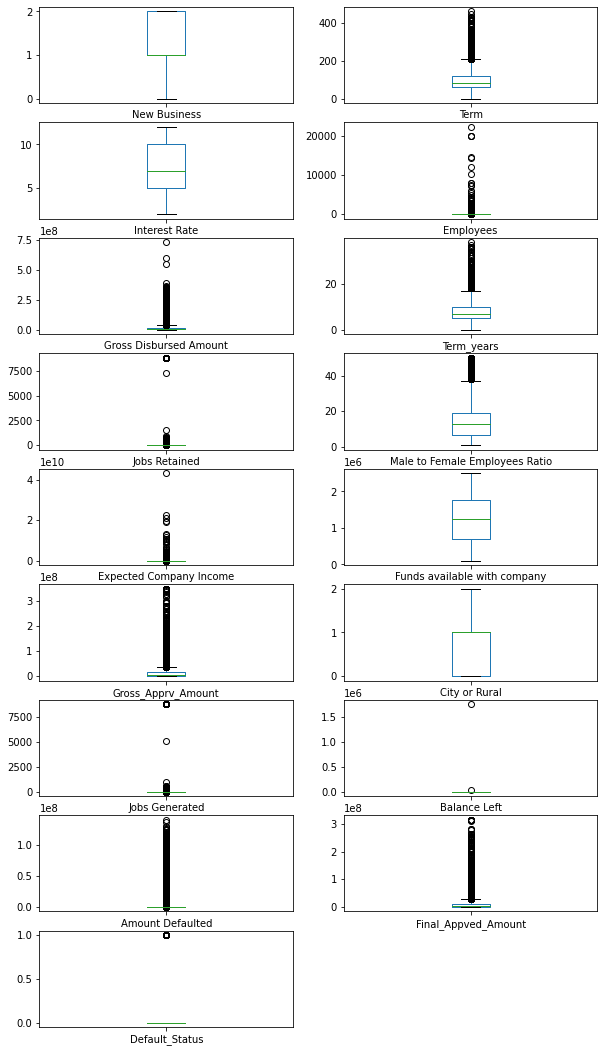

In [27]:
df_num.plot(kind='box', subplots=True,figsize=(10, 40),layout=(19,2),  sharex=False, sharey=False)
plt.show()

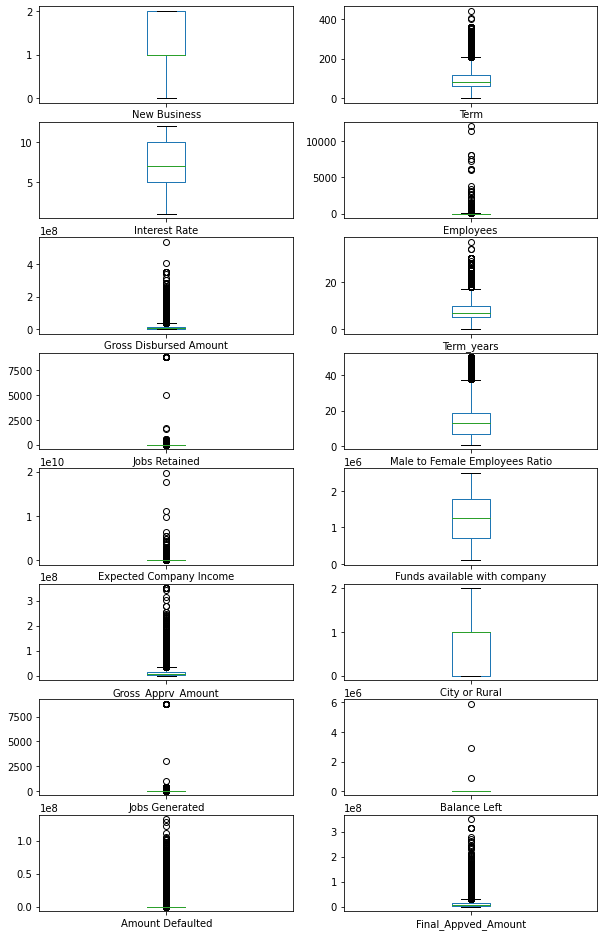

In [328]:
df_num1.plot(kind='box', subplots=True,figsize=(10, 40),layout=(19,2),  sharex=False, sharey=False)
plt.show()

<AxesSubplot:xlabel='Default_Status', ylabel='count'>

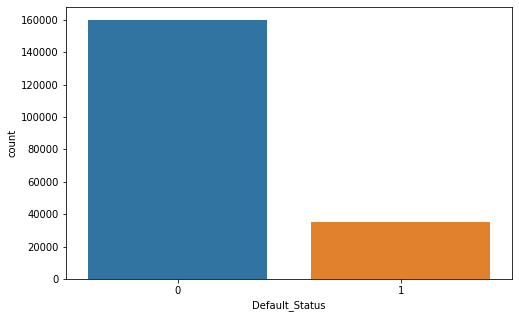

In [329]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(df['Default_Status'])

In [330]:
df['Default_Status'].value_counts()/len(df['Default_Status'])*100

0    81.940159
1    18.059841
Name: Default_Status, dtype: float64

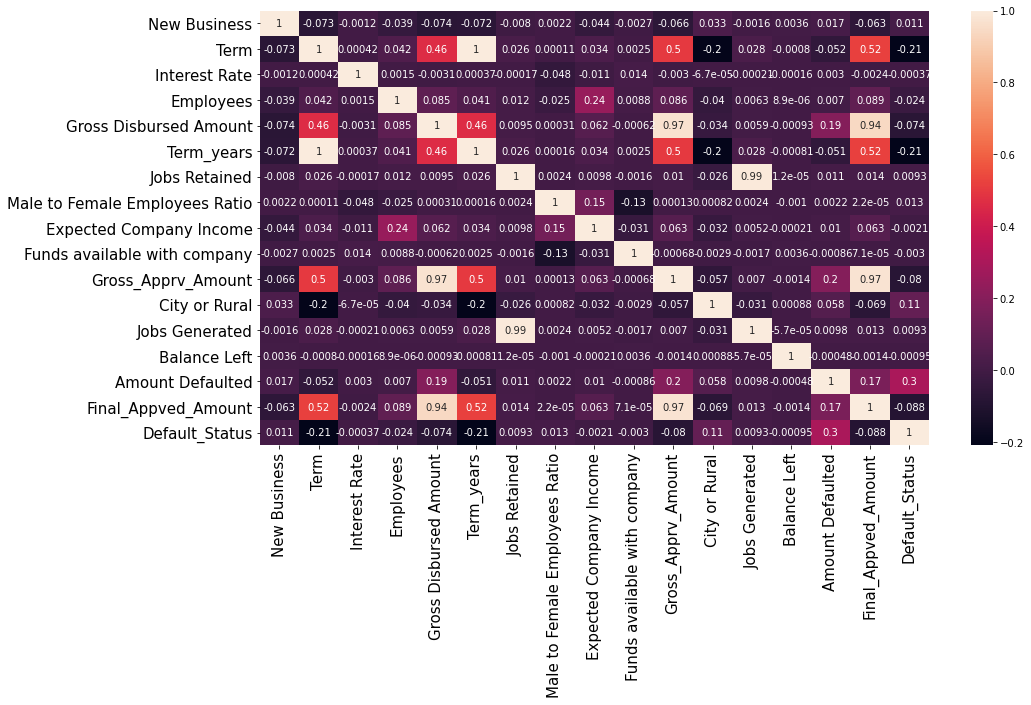

In [331]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 10})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)
# display the plot
plt.show()

In [332]:
sum_column = df["Jobs Generated"] + df["Jobs Retained"]
df["Total Jobs"] = sum_column
df.head()

,Bank Masked,Bank Type,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,BankState,Interest Rate,...,Funds available with company,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status,Total Jobs
Application ID,,,,,,,,,,,,,,,,,,,,,
1020200001,Bank_Name_316,Private,Business_Name_10007,Uttar Pradesh,525161,2005,1.0,219,Uttar Pradesh,3,...,780590,18550000,25650,1,3,0,0,13912500,0,21
1020200002,Bank_Name_1062,Govt,Business_Name_130906,Uttar Pradesh,1231,2006,1.0,71,Uttar Pradesh,5,...,1835637,2450000,0,1,0,0,2369500,1225000,1,10
1020200003,Bank_Name_39,Private,Business_Name_105953,Uttar Pradesh,322442,2007,2.0,84,Maharashtra,8,...,2373333,1750000,0,2,2,0,0,1487500,0,12
1020200004,Bank_Name_3,Govt,Business_Name_103197,Kerala,1231,2009,1.0,300,Delhi,8,...,2346786,38850000,1,1,0,0,0,29137500,0,2
1020200005,Bank_Name_126,Govt,Business_Name_118932,Delhi,1231,2002,2.0,153,Maharashtra,11,...,2382995,2800000,1,2,0,0,0,2380000,0,0


In [333]:
male_column = df["Employees"] / df["Male to Female Employees Ratio"] 
df["Total Male"] = round(male_column)
female_column = df["Employees"] - df["Total Male"]
df["Total Female"] = round(female_column)
df.head()

,Bank Masked,Bank Type,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,BankState,Interest Rate,...,Company Branch Code,City or Rural,Jobs Generated,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status,Total Jobs,Total Male,Total Female
Application ID,,,,,,,,,,,,,,,,,,,,,
1020200001,Bank_Name_316,Private,Business_Name_10007,Uttar Pradesh,525161,2005,1.0,219,Uttar Pradesh,3,...,25650,1,3,0,0,13912500,0,21,10.0,32.0
1020200002,Bank_Name_1062,Govt,Business_Name_130906,Uttar Pradesh,1231,2006,1.0,71,Uttar Pradesh,5,...,0,1,0,0,2369500,1225000,1,10,1.0,19.0
1020200003,Bank_Name_39,Private,Business_Name_105953,Uttar Pradesh,322442,2007,2.0,84,Maharashtra,8,...,0,2,2,0,0,1487500,0,12,2.0,14.0
1020200004,Bank_Name_3,Govt,Business_Name_103197,Kerala,1231,2009,1.0,300,Delhi,8,...,1,1,0,0,0,29137500,0,2,1.0,3.0
1020200005,Bank_Name_126,Govt,Business_Name_118932,Delhi,1231,2002,2.0,153,Maharashtra,11,...,1,2,0,0,0,2380000,0,0,0.0,4.0


In [334]:
df['Term'] = round((df['Term']/12),2)

In [335]:
df = df.drop(['Term_years','Final_Appved_Amount',"Jobs Generated","Jobs Retained",'Gross Disbursed Amount',"Employees","Male to Female Employees Ratio",'Business_Industry_Type_Code','Bank Masked','Name Masked','Company Branch Code'],axis=1)

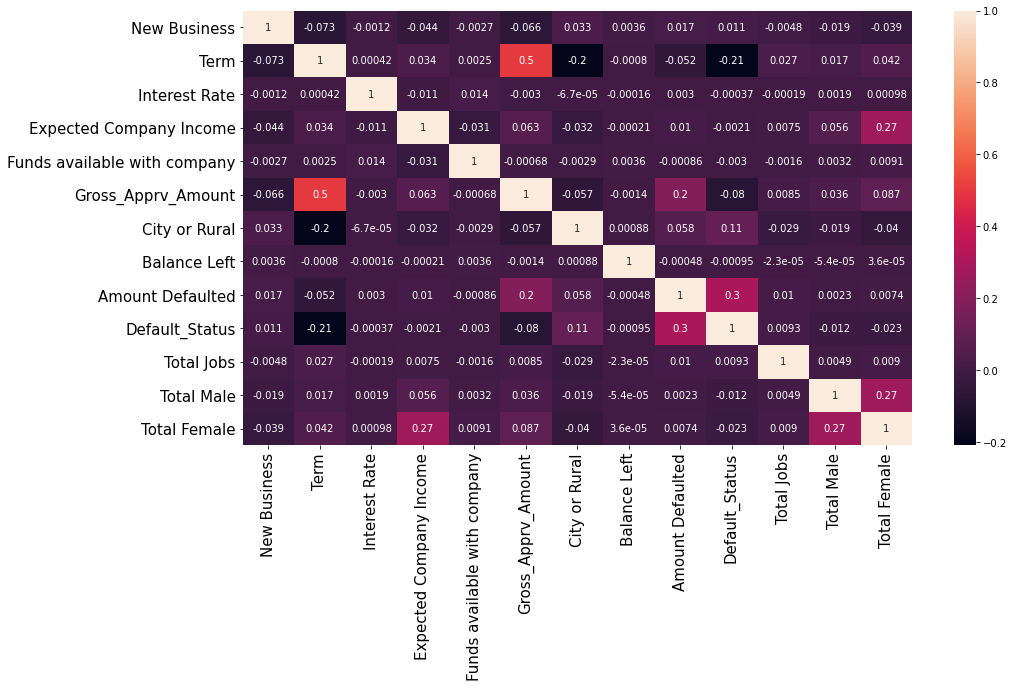

In [336]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 10})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)
# display the plot
plt.show()

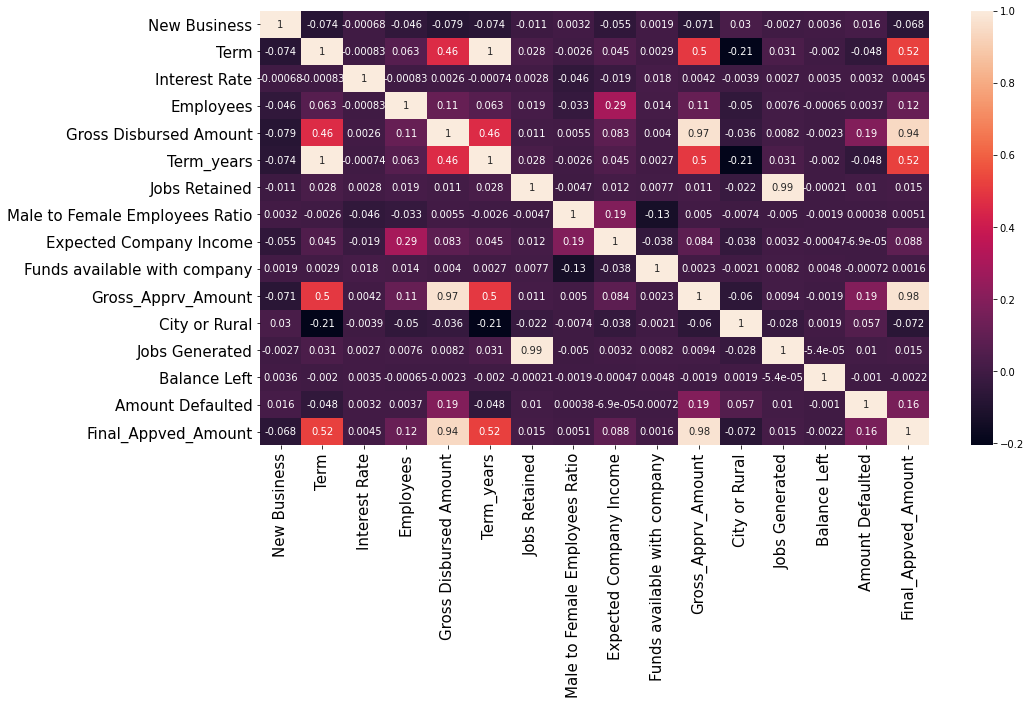

In [337]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(df1.corr(), annot = True, annot_kws = {"size": 10})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)
# display the plot
plt.show()

In [338]:
sum_column = df1["Jobs Generated"] + df1["Jobs Retained"]
df1["Total Jobs"] = sum_column
df1.head()

,Bank Masked,Bank Type,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,BankState,Interest Rate,...,Expected Company Income,Funds available with company,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Balance Left,Amount Defaulted,Final_Appved_Amount,Total Jobs
Application ID,,,,,,,,,,,,,,,,,,,,,
20210600001,Bank_Name_17,Private,Business_Name_113587,Maharashtra,562961,2003,2.0,240,Delhi,8,...,2500000,650447,30100000,1,0,15,0,0,30100000,15
20210600002,Bank_Number_2123,Govt,Business_Name_22345,Delhi,1230,2010,1.0,87,Delhi,8,...,42000000,1762036,7000000,30811,0,0,0,0,6300000,0
20210600003,Bank_Number_581,Private,Business_Name_31551,Maharashtra,612749,2012,1.0,84,Maharashtra,12,...,2000000,127229,1680000,0,1,0,0,0,840000,1
20210600004,Bank_Number_61,Private,Business_Name_62545,Uttar Pradesh,237160,2010,1.0,93,Uttar Pradesh,7,...,39200000,317054,6230000,78760,0,0,0,0,5607000,0
20210600005,Bank_Name_5452,Private,Business_Name_139383,Haryana,444351,2004,1.0,240,Delhi,4,...,3000000,1803649,41930000,1,0,4,0,0,41930000,18


In [339]:
male_column = df1["Employees"] / df1["Male to Female Employees Ratio"] 
df1["Total Male"] = round(male_column)
female_column = df1["Employees"] - df1["Total Male"]
df1["Total Female"] = round(female_column)
df1.head()

,Bank Masked,Bank Type,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,BankState,Interest Rate,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Balance Left,Amount Defaulted,Final_Appved_Amount,Total Jobs,Total Male,Total Female
Application ID,,,,,,,,,,,,,,,,,,,,,
20210600001,Bank_Name_17,Private,Business_Name_113587,Maharashtra,562961,2003,2.0,240,Delhi,8,...,30100000,1,0,15,0,0,30100000,15,4.0,26.0
20210600002,Bank_Number_2123,Govt,Business_Name_22345,Delhi,1230,2010,1.0,87,Delhi,8,...,7000000,30811,0,0,0,0,6300000,0,0.0,5.0
20210600003,Bank_Number_581,Private,Business_Name_31551,Maharashtra,612749,2012,1.0,84,Maharashtra,12,...,1680000,0,1,0,0,0,840000,1,0.0,1.0
20210600004,Bank_Number_61,Private,Business_Name_62545,Uttar Pradesh,237160,2010,1.0,93,Uttar Pradesh,7,...,6230000,78760,0,0,0,0,5607000,0,12.0,37.0
20210600005,Bank_Name_5452,Private,Business_Name_139383,Haryana,444351,2004,1.0,240,Delhi,4,...,41930000,1,0,4,0,0,41930000,18,2.0,34.0


In [340]:
df1['Term'] = round((df1['Term']/12),2)

In [341]:
df1 = df1.drop(['Term_years','Final_Appved_Amount',"Jobs Generated","Jobs Retained",'Gross Disbursed Amount',"Employees","Male to Female Employees Ratio",'Business_Industry_Type_Code','Bank Masked','Name Masked','Company Branch Code'],axis=1)

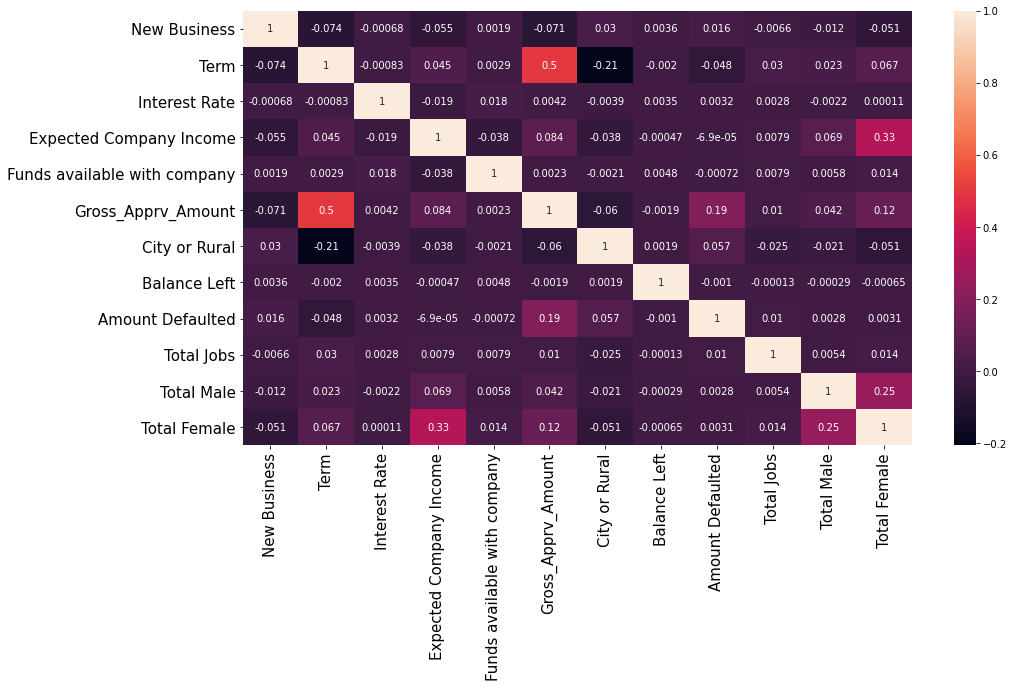

In [342]:
plt.rcParams['figure.figsize'] = (15,8)
sns.heatmap(df1.corr(), annot = True, annot_kws = {"size": 10})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(rotation = 'vertical',fontsize = 15)
# display the plot
plt.show()

In [343]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Bank Type'] = labelencoder.fit_transform(df['Bank Type'])
df['Business Owner State'] = labelencoder.fit_transform(df['Business Owner State'])
df['Approved_Year'] = labelencoder.fit_transform(df['Approved_Year'])
df['BankState'] = labelencoder.fit_transform(df['BankState'])
df.head()

,Bank Type,Business Owner State,Approved_Year,New Business,Term,BankState,Interest Rate,Expected Company Income,Funds available with company,Gross_Apprv_Amount,City or Rural,Balance Left,Amount Defaulted,Default_Status,Total Jobs,Total Male,Total Female
Application ID,,,,,,,,,,,,,,,,,
1020200001,1,8,6,1.0,18.25,10,3,3500000.0,780590,18550000,1,0,0,0,21,10.0,32.0
1020200002,0,8,7,1.0,5.92,10,5,1666667.0,1835637,2450000,1,0,2369500,1,10,1.0,19.0
1020200003,1,8,8,2.0,7.00,6,8,1333333.0,2373333,1750000,2,0,0,0,12,2.0,14.0
1020200004,0,3,10,1.0,25.00,1,8,333333.0,2346786,38850000,1,0,0,0,2,1.0,3.0
1020200005,0,0,3,2.0,12.75,6,11,333333.0,2382995,2800000,2,0,0,0,0,0.0,4.0


In [344]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['Bank Type'] = labelencoder.fit_transform(df1['Bank Type'])
df1['Business Owner State'] = labelencoder.fit_transform(df1['Business Owner State'])
df1['Approved_Year'] = labelencoder.fit_transform(df1['Approved_Year'])
df1['BankState'] = labelencoder.fit_transform(df1['BankState'])

df1.head()

,Bank Type,Business Owner State,Approved_Year,New Business,Term,BankState,Interest Rate,Expected Company Income,Funds available with company,Gross_Apprv_Amount,City or Rural,Balance Left,Amount Defaulted,Total Jobs,Total Male,Total Female
Application ID,,,,,,,,,,,,,,,,
20210600001,1,4,4,2.0,20.00,1,8,2500000,650447,30100000,0,0,0,15,4.0,26.0
20210600002,0,0,11,1.0,7.25,1,8,42000000,1762036,7000000,0,0,0,0,0.0,5.0
20210600003,1,4,13,1.0,7.00,6,12,2000000,127229,1680000,1,0,0,1,0.0,1.0
20210600004,1,8,11,1.0,7.75,10,7,39200000,317054,6230000,0,0,0,0,12.0,37.0
20210600005,1,1,5,1.0,20.00,1,4,3000000,1803649,41930000,0,0,0,18,2.0,34.0


In [345]:
df_cat.columns

Index(['Bank Masked', 'Bank Type', 'Name Masked', 'Business Owner State',
       'Business_Industry_Type_Code', 'Approved_Year', 'BankState',
       'Company Branch Code'],
      dtype='object')

In [346]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
target = 'Default_Status'
X = df.loc[:, df.columns != target]
#X = X.apply(zscore)
y = df.loc[:, target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [347]:
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (156094, 16)
y_train dataset:  (156094,)
X_test dataset:  (39024, 16)
y_test dataset:  (39024,)


In [348]:
from imblearn.over_sampling import SMOTE

In [349]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 28184
Before OverSampling, counts of label '0': 127910 

After OverSampling, the shape of train_X: (255820, 16)
After OverSampling, the shape of train_y: (255820,) 

After OverSampling, counts of label '1': 127910
After OverSampling, counts of label '0': 127910


# Applying Models

In [350]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [351]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[127910      0]
 [     0 127910]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                  0         1  accuracy  macro avg  weighted avg
precision       1.0       1.0       1.0        1.0           1.0
recall          1.0       1.0       1.0        1.0           1.0
f1-score        1.0       1.0       1.0        1.0           1.0
support    127910.0  127910.0       1.0   255820.0      255820.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[31379   591]
 [ 2363  4691]]
ACCURACY SCORE:
0.9243
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.929969     0.888111  0.924303      0.909040      0.922402
recall         0.981514     0.665013  0.924303      0.823263      0.924303
f1-score       0.955046     0.760538  0.924303      0.857792      0.919887
support    31970.000000  7054.000000  0.924303  39024.000000  39024.000000


In [353]:
y_pred=rf_clf.predict(X_test)

# Tried AUTOML

# Metric Evaluation

In [354]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [355]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[31379   591]
 [ 2363  4691]]


In [356]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     31970
           1       0.89      0.67      0.76      7054

    accuracy                           0.92     39024
   macro avg       0.91      0.82      0.86     39024
weighted avg       0.92      0.92      0.92     39024



In [357]:
from sklearn.metrics import cohen_kappa_score

y_pred = clf.predict(X_test)

y_pred = [ 0 if x < 0.18 else 1 for x in y_pred]

kappa = cohen_kappa_score(y_test, y_pred)

print('kappa value:',kappa)

kappa value: 0.716488456807868


In [358]:
print('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred),4))

AUC Score: 0.8236


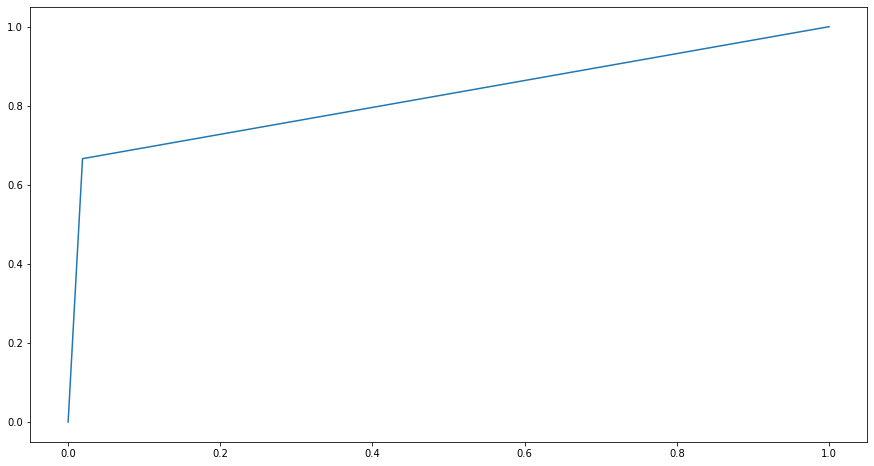

In [359]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

# Tunning

# Fitting

In [360]:
test = pd.DataFrame(clf.predict(df1))

In [361]:
test = pd.DataFrame(test)
test = test.rename(columns = {0: 'Default_Status'}, inplace = False)
test

,Default_Status
0,0
1,0
2,0
3,0
4,0
...,...
83618,0
83619,1
83620,0
83621,0


In [362]:
df2 = pd.read_csv('Sample_Sub.csv')
df2 = df2.drop('Default_Status',axis='columns')
df2

,Application ID
0,20210600001
1,20210600002
2,20210600003
3,20210600004
4,20210600005
...,...
83618,20210683619
83619,20210683620
83620,20210683621
83621,20210683622


In [363]:
final = pd.concat([df2,test], axis=1)
final = final.dropna()

In [364]:
final

,Application ID,Default_Status
0,20210600001,0
1,20210600002,0
2,20210600003,0
3,20210600004,0
4,20210600005,0
...,...,...
83618,20210683619,0
83619,20210683620,1
83620,20210683621,0
83621,20210683622,0


In [365]:
final.to_csv("final.csv", index=False)